#  Boston House Sales Prediction using SGDRegression

#### Using Boston House Price dataset, build a model using SGDRegression and perform 500 iterations. Predict the results

# Create SGDRegressor and predict prices

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#### Load Boston dataset

In [2]:
boston = datasets.load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target.shape)

(506,)


#### Split dataset into training set and test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.20, random_state=5)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


#### Uncomment the following line to observe output

In [12]:
#print(X_train[:3])

#### Normalize dataset values

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Uncomment the following line to observe output

In [16]:
#print(X_train_scaled[:3])

#### Create SGDRegressor model and train it

In [19]:
sgdmodel = SGDRegressor(penalty='l2', alpha=0.15)

In [20]:
sgdmodel.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.15, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

#### Print model parameters

In [22]:
print(sgdmodel.coef_)

[-0.84219931  0.66948809 -0.4324308   0.79251039 -0.86798624  2.55234169
 -0.1591239  -1.87845771  1.01216043 -0.47805701 -1.70695509  0.94767037
 -3.39745848]


In [23]:
print(sgdmodel.intercept_)

[22.66414385]


#### Predict target values for test set

In [24]:
y_pred = sgdmodel.predict(X_test_scaled)

#### Examine target and predicted values of test set

In [25]:
print(y_pred[:5])  #first 5 predictions

[35.85297853 30.53827475 27.32881523  7.87809702 35.01955401]


In [26]:
print(y_test[:5])  #first 5 actual price

[37.6 27.9 22.6 13.8 35.2]


#### Draw Scatter plot

Text(0.5, 1.0, 'House Price vs Predicted Price using SGDRegressor')

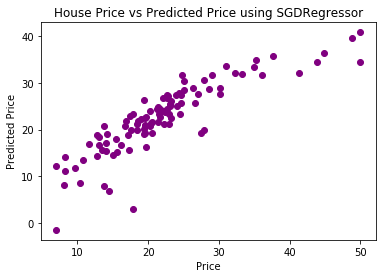

In [28]:
plt.scatter(y_test, y_pred,color='purple')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('House Price vs Predicted Price using SGDRegressor')

In [29]:
print('R-square value of training set: %.3f' % (sgdmodel.score(X_train_scaled, y_train)))

R-square value of training set: 0.720


In [30]:
print('R-square value of test set: %.3f' % (sgdmodel.score(X_test_scaled, y_test)))

R-square value of test set: 0.746


In [31]:
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error: %.3f' %mse)

Mean Squared Error: 19.916
